# Config Environment

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC, LinearSVC

# Normalizer

Normalize non-float numbers and remove NAN or Inf values and replace them with zero.

due to the small number of NANS we could also drop them

Class to help normalize data


In [ ]:
class DataNormalizer:

  def __init__(self,raw_data):
    self.raw_data = raw_data

  def normalize_raw_data(self, print_stats=False):

    available_labels_values = list(set(self.raw_data.values[:,23]))
    available_labels_values.sort()
    available_lables_values = { val : index for index, val in enumerate(available_labels_values)}
    if print_stats:
      print(available_lables_values)

    for key, dedicated_number in available_lables_values.items():
      columns_name = self.raw_data.columns[23]
      self.raw_data.loc[self.raw_data[columns_name] == key, columns_name] = dedicated_number

    
    available_gender_values = list(set(self.raw_data.values[:,1]))
    available_gender_values.sort()
    available_gender_values = { val : index for index, val in enumerate(available_gender_values)}
    if print_stats:
      print(available_gender_values)

    for key, dedicated_number in available_gender_values.items():
      columns_name = self.raw_data.columns[1]
      self.raw_data.loc[self.raw_data[columns_name] == key, columns_name] = dedicated_number
    
    available_customer_type = list(set(self.raw_data.values[:,2]))
    available_customer_type.sort()
    available_customer_type = { val : index for index, val in enumerate(available_customer_type)}
    if print_stats:
      print(available_customer_type)

    for key, dedicated_number in available_customer_type.items():
      columns_name = self.raw_data.columns[2]
      self.raw_data.loc[self.raw_data[columns_name] == key, columns_name] = dedicated_number
    
    available_type_of_travel = list(set(self.raw_data.values[:,4]))
    available_type_of_travel.sort()
    available_type_of_travel = { val : index for index, val in enumerate(available_type_of_travel)}
    if print_stats:
      print(available_type_of_travel)

    for key, dedicated_number in available_type_of_travel.items():
      columns_name = self.raw_data.columns[4]
      self.raw_data.loc[self.raw_data[columns_name] == key, columns_name] = dedicated_number
    
    available_classes = list(set(self.raw_data.values[:,5]))
    available_classes.sort()
    available_classes = { val : index for index, val in enumerate(available_classes)}
    if print_stats:
      print(available_classes)

    for key, dedicated_number in available_classes.items():
      columns_name = self.raw_data.columns[5]
      self.raw_data.loc[self.raw_data[columns_name] == key, columns_name] = dedicated_number
    
    self.raw_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    return self.raw_data.dropna()

# Load Data

Load Dataframe from csv files and provide needed data for models

Class to help extract features and labels from loaded data

In [ ]:
class DataLoader:

  def __init__(self):
    self.raw_data_filePath = '/content/drive/MyDrive/AI/SVM-Perceptron/data/train.csv'
    self.test_data_filePath = '/content/drive/MyDrive/AI/SVM-Perceptron/data/test.csv'
    self.raw_data = None
    self.test_data = None
    self.normalized_raw_data = None
    self.normalized_raw_test_data = None
    self.train_data_features = None
    self.train_data_labels = None
    self.test_data_features = None
    self.test_data_labels = None

  # Load Raw Data from CSV , Replace Infinity with NAN, and replace every NAN with zero for Raw Data with Normalizer

  def load_raw_data(self):
    if not self.raw_data:
      self.raw_data = pd.read_csv(self.raw_data_filePath)
      self.raw_data = self.raw_data.drop(self.raw_data.columns[[0]], axis=1) 
      normalizer = DataNormalizer(self.raw_data)
      self.raw_data = normalizer.normalize_raw_data()
    print('Raw Data Shape: ', self.raw_data.shape)
    return self.raw_data
  
  def load_test_data(self):
    if not self.test_data:
      self.test_data = pd.read_csv(self.test_data_filePath)
      self.test_data = self.test_data.drop(self.test_data.columns[[0]], axis=1)
      normalizer = DataNormalizer(self.test_data)
      self.test_data = normalizer.normalize_raw_data() 
    print('Test Data Shape: ', self.test_data.shape)
    return self.test_data

  def load_train_data_features(self):
    if not self.train_data_features:
      self.train_data_features = self.raw_data.values[:, 1:23].astype('float32')
      print('Train Data Shape', self.train_data_features.shape)
      return self.train_data_features

  def load_train_data_labels(self):
    if not self.train_data_labels:
      self.train_data_labels = self.raw_data.values[:, 23].astype('float32')
      print('Train Data Labels Shape', self.train_data_labels.shape)
      return self.train_data_labels

  def load_test_data_features(self):
    if not self.test_data_features:
      self.test_data_features = test_data.values[:, 1:23].astype('float32')
      print('Test Data Shape', self.test_data_features.shape)
      return self.test_data_features

  def load_test_data_labels(self):
    if not self.test_data_labels:
      self.test_data_labels = test_data.values[:, 23].astype('float32')
      print('Test Data Labels Shape', self.test_data_labels.shape)
      return self.test_data_labels

In [ ]:
loader = DataLoader()

In [ ]:
raw_data = loader.load_raw_data()
test_data = loader.load_test_data()

Raw Data Shape:  (103594, 24)
Test Data Shape:  (25893, 24)


Load Raw Data without any normalization or manipulations

In [ ]:
train_data_features = loader.load_train_data_features()

train_data_labels = loader.load_train_data_labels()

Train Data Shape (103594, 22)
Train Data Labels Shape (103594,)


Load Normalized and preprocessed dataframe for train data

In [ ]:
test_data_features = loader.load_test_data_features()

test_data_labels = loader.load_test_data_labels()

Test Data Shape (25893, 22)
Test Data Labels Shape (25893,)


Load Normalized and preprocessed dataframe for test data

# Perceptron

Test perceptron models with different hyperparam and analysis the result

In [ ]:
class PerceptronTest:

  def __init__(self, train_data_features, train_data_labels):
    self.perceptron_model = None
    self.train_data_features = train_data_features
    self.train_data_labels = train_data_labels
  
  def simple_test(self, test_data_features, test_data_labels):
    self.perceptron_model = Perceptron(random_state=1)
    self.perceptron_model.fit(self.train_data_features, self.train_data_labels)
    print(f"Perceptron model score: { self.perceptron_model.score(self.train_data_features, self.train_data_labels) * 100}")

    predicted_labels = np.array(self.perceptron_model.predict(test_data_features))
    print('rand score of perdiction', rand_score(test_data_labels, predicted_labels) * 100)
    print('accuracy of perdiction', accuracy_score(test_data_labels, predicted_labels, normalize=False))

  def test_best(self, eta, maxIt, test_data_features, test_data_labels):
    self.perceptron_model = Perceptron(random_state=20, eta0=0.01, max_iter=maxIt)
    self.perceptron_model.fit(self.train_data_features, self.train_data_labels)
    print(f"Perceptron model score: { self.perceptron_model.score(self.train_data_features, self.train_data_labels) * 100}")

    predicted_labels = np.array(self.perceptron_model.predict(test_data_features))
    print('rand score of perdiction', rand_score(test_data_labels, predicted_labels) * 100)
    print('accuracy of perdiction', accuracy_score(test_data_labels, predicted_labels, normalize=False))

  
  def learning_rate_test(self, grid=None):
    perceptron_model = Perceptron(random_state=20)
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    if not grid:
      grid = dict()
      grid['eta0'] = [0.0001, 0.001, 0.01, 0.1, 5.0]

    search = GridSearchCV(perceptron_model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

    results = search.fit(self.train_data_features, self.train_data_labels)

    print('Mean Accuracy: %.3f' % results.best_score_)
    print('Best Learning Rate: %s' % results.best_params_)

    means = results.cv_results_['mean_test_score']
    params = list(map(lambda dic : dic['eta0'], results.cv_results_['params']))

    plt.plot(params, means)
    plt.suptitle('Learning Rate On Score')
    plt.ylabel("Mean Test Score")
    plt.xlabel("Learning Rate")
    plt.show()
  
  def iteration_test(self, grid=None):

    perceptron_model = Perceptron(eta0=0.01)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    if not grid:
      grid = dict()
      grid['max_iter'] = [1, 10, 100, 1000, 10000]

    search = GridSearchCV(perceptron_model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

    results = search.fit(train_data_features, train_data_labels)

    print('Mean Accuracy: %.3f' % results.best_score_)
    print('Best IterationCount: %s' % results.best_params_)

    means = results.cv_results_['mean_test_score']
    params = list(map(lambda dic : dic['max_iter'], results.cv_results_['params']))

    plt.plot(params, means)
    plt.suptitle('Iteration Rate On Score')
    plt.ylabel("Mean Test Score")
    plt.xlabel("Iteration")
    plt.show()



In [ ]:
perceptron_test = PerceptronTest(train_data_features, train_data_labels)

In [ ]:
perceptron_test.simple_test(test_data_features, test_data_labels)

Perceptron model score: 78.36168117844663
rand score of perdiction 66.05052418690428
accuracy of perdiction 20282


Mean Accuracy: 0.686
Best Learning Rate: {'eta0': 0.1}


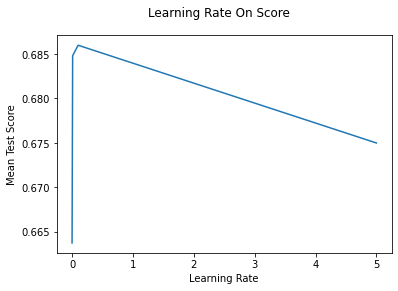

In [ ]:
perceptron_test.learning_rate_test()

The hyperparameters for the Perceptron algorithm must be configured for our dataset.

Perhaps the most important hyperparameter is the learning rate.

A large learning rate can cause the model to learn fast, but perhaps at the cost of lower skill. A smaller learning rate can result in a better-performing model but may take a long time to train the model.

Mean Accuracy: 0.675
Best IterationCount: {'max_iter': 100}


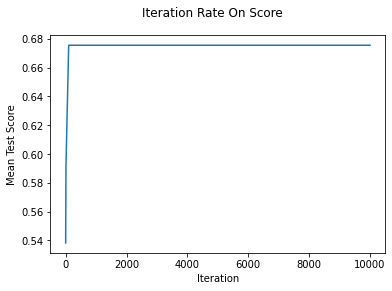

In [ ]:
perceptron_test.iteration_test()

Another important hyperparameter is how many epochs are used to train the model.

This may depend on the training dataset and could vary greatly. Again, we will explore configuration values on a log scale between 1 and 1e+4.

In [ ]:
perceptron_test.test_best(0.1, 100, test_data_features, test_data_labels)

Perceptron model score: 72.78799930497905
rand score of perdiction 60.546912963520526
accuracy of perdiction 18893


Final result for Perceptron with the best hyperparams

# SVM Test

class for testing different kinds of svm in sklearn



In [ ]:
class SVMTest:

  def __init__(self, svm_model, train_data_features, train_data_labels):
    self.svm_model = svm_model
    self.train_data_features = train_data_features
    self.train_data_labels = train_data_labels

  def test_svm(self, test_data_features, test_data_labels):
    start = time.time()
    # fit model
    self.svm_model.fit(self.train_data_features, self.train_data_labels)

    # Predict traint model
    train_predict = self.svm_model.predict(self.train_data_features)
    
    train_purity = accuracy_score(train_predict, self.train_data_labels)

    train_rand_index = adjusted_rand_score(train_predict, self.train_data_labels)

    # Predict Test
    test_predict = self.svm_model.predict(test_data_features)

    test_purity = accuracy_score(test_predict, test_data_labels)

    test_rand_index = adjusted_rand_score(test_predict, test_data_labels)

    print(f'Train Data Accuracy : {round(train_purity * 100, 2)}%')
    print(f'Train Data Rand-Index : {round(train_rand_index * 100, 2)}%')
    print(f'Test Data Accuracy : {round(test_purity * 100, 2)}%')
    print(f'Test Data Rand-Index : {round(test_rand_index * 100, 2)}%')
    print('Time Taken(s): ', time.time() - start)

    return train_purity, train_rand_index, test_purity, test_rand_index


# SVC vs LinearSVC
SVC has multiple kernels which allows us to classify non-linear data. <br>
the simplest kernel is the linear kernel. according to the documentation for the `SVC` on `sklearn` website, 
> *The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC* <br>

And since we are working on a dataset with 100 thousand data with 22 dimension, it would take a lot of time for fitting our dataset with the normal `SVC` class. <br>
But we have to consider that the `LinearSVC` class is just for the linear kernel, so for other kernels we have to use the `SVC` class.

In [ ]:
linear_kerner_svm = SVMTest(SVC(kernel='linear'), train_data_features, train_data_labels)
linear_kerner_svm.test_svm(test_data_features, test_data_labels)

In [ ]:
linear_kerner_svm = SVMTest(LinearSVC(), train_data_features, train_data_labels)
linear_kerner_svm.test_svm(test_data_features, test_data_labels)

Train Data Purity : 49.08%
Train Data Rand-Index : -1.31%
Test Data Purity : 49.52%
Test Data Rand-Index : -1.12%
Time Taken(s):  406.74503445625305


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


(0.490810278587563,
 -0.01307423950859963,
 0.4952303711427799,
 -0.011220777246988297)

In the above code I used both the `SVC` class with linear kernel and the `LinearSVC`. <br>
The execution time for the normal `SVC` is over 5 hour, but the `LinearSVC` has only taken 5 minutes with 10,000 iteration to execute. <br>
Although the accuracy of the `SVC` class is better, but it is not as much different as the execution time, and we are sure that if we improve the accuracy of `LinearSVC`, by using the same parameters we will also improve the `SVC` model too. <br>
Therefore I chose the `LinearSVC` model for the following codes. But as soon as we are done the linear kernel, we will switch back to the `SVC` class. <br>
And also the `LinearSVC` uses the one-vs-all technique and unfortunately it can not be changed, so I used the normal `SVC` for testing this parameter.

# LinearSVC

In [ ]:
duals = [True, False]

for dual in duals:
    linear_kerner_svm = SVMTest(LinearSVC(dual=dual), train_data_features, train_data_labels)
    print('dual: ', dual)
    linear_kerner_svm.test_svm(test_data_features, test_data_labels)
    print(' ')

dual:  True


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Train Data Accuracy : 64.99%
Test Data Accuracy : 64.25%
Time Taken(s):  43.76734662055969
 
dual:  False
Train Data Accuracy : 87.39%
Test Data Accuracy : 86.99%
Time Taken(s):  3.1868669986724854
 


The first parameter that I test is the `dual` parameter. <br>
The duality optimization is a theory which divide the solution of a problem into a *'dual*' solution and a *'primal'* solution. <br>
The primal solution is the main and more complete solution which will also take longer time, but the dual solution is a solution which is one step before the main solution. <br> 
The properties of dual solution is that its answer is too much close to the main solution, even sometimes better, and it will also produce the answer in a much slower time. <br>
According to the documentation of the `sklearn`:
> Select the algorithm to either solve the dual or primal optimization problem. Prefer `dual=False` when `n_samples > n_features`.

`n_samples` means the number of samples of our train dataset, which is 100 thousand and the `n_features` means the dimension of our data, which is 22. <br>
So `sklearn` suggests us to set `dual=False` for our problem, and also according to the code above, the `dual=False` has a slightly more accurate answer.

Train Data Accuracy : 87.47%
Test Data Accuracy : 87.1%
Time Taken(s):  2.923678159713745

Train Data Accuracy : 87.48%
Test Data Accuracy : 87.13%
Time Taken(s):  3.415372133255005

Train Data Accuracy : 87.47%
Test Data Accuracy : 87.12%
Time Taken(s):  3.5073723793029785

Train Data Accuracy : 87.48%
Test Data Accuracy : 87.12%
Time Taken(s):  3.3485043048858643

Train Data Accuracy : 87.48%
Test Data Accuracy : 87.12%
Time Taken(s):  3.4395785331726074

Train Data Accuracy : 87.47%
Test Data Accuracy : 87.09%
Time Taken(s):  3.3101449012756348

Train Data Accuracy : 87.39%
Test Data Accuracy : 86.99%
Time Taken(s):  3.2212650775909424

Train Data Accuracy : 87.47%
Test Data Accuracy : 87.11%
Time Taken(s):  3.402167797088623

Train Data Accuracy : 87.48%
Test Data Accuracy : 87.11%
Time Taken(s):  3.3236005306243896



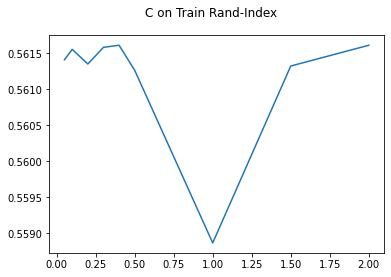

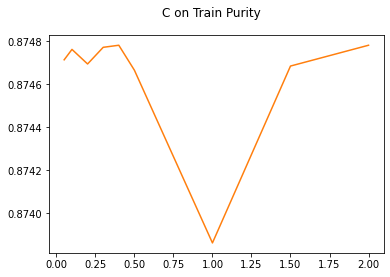

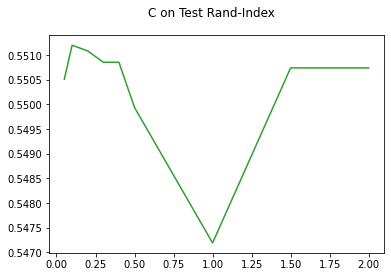

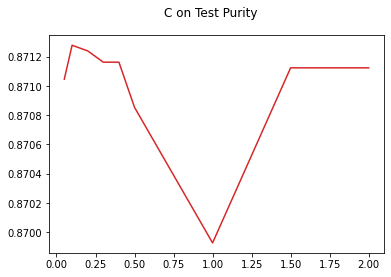

In [ ]:
coeffs = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2]
train_purities = []
train_rand_indexes = []
test_purities = []
test_rand_indexes = []

for c in coeffs :
    linear_kerner_svm = SVMTest(LinearSVC(dual=False, C=c), train_data_features, train_data_labels)

    train_purity, train_rand_index, test_purity, test_rand_index = linear_kerner_svm.test_svm(test_data_features, test_data_labels)
    train_purities.append(train_purity)
    train_rand_indexes.append(train_rand_index)
    test_purities.append(test_purity)
    test_rand_indexes.append(test_rand_index)
    print()

plt.plot(coeffs, train_rand_indexes)
plt.suptitle('C on Train Rand-Index')
plt.show()
plt.plot(coeffs, train_purities, 'tab:orange')
plt.suptitle('C on Train Purity')
plt.show()
plt.plot(coeffs, test_rand_indexes, 'tab:green')
plt.suptitle('C on Test Rand-Index')
plt.show()
plt.plot(coeffs, test_purities, 'tab:red')
plt.suptitle('C on Test Purity')
plt.show()

The above code shows the effect of `C` parameter on accuracy. <br>
Parameter `C` can be viewed as a way to control overfitting. It trades off the relative importance of maximizing the margin and fitting the training data. <br>
It is for controlling the effect of slack variables. slack variables are defined for measuring the misclassification of difficult or noisy examples. <br>
As you can see in the plots, by increasing this value, we will have a better accuracy for our training data, but less accuracy for test data. <br>
This behaviour was expected, because we are allowing more slack variables and noises to our fitting process, which will lead to less accuracy for external data. ( data which are not in the train dataset) <br>
According to the plots the best value for this parameter is 1.5. <br>

# SVC
Up to now all our codes have used the `LinearSVC` class and we have figured out that the best parameters are `C=0.4` and `dual=False`. <br>
These values will also have the best effect on the normal `SVC`, because they are the same but with different implementation. <br>
As I said, and just like the documentations said, the execution time of `SVC` for our full dataset will be too much, therefore I chose 10% of data randomly and work with them, we can use the result for the whole dataset and get better accuracy. <br>

(10000, 22)
(10000,)
(5000, 22)
(5000,)


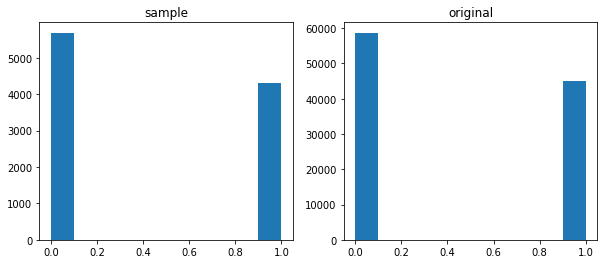

In [ ]:
seq = np.random.randint(0,103594,10000)
X_train_sample = train_data_features[seq]
y_train_sample = train_data_labels[seq]

print(X_train_sample.shape)
print(y_train_sample.shape)

seq = np.random.randint(0,25893,5000)
X_test_sample = test_data_features[seq]
y_test_sample = test_data_labels[seq]

print(X_test_sample.shape)
print(y_test_sample.shape)

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].hist(y_train_sample)
ax[0].title.set_text('sample')
ax[1].hist(train_data_labels)
ax[1].title.set_text('original')
fig.show
plt.show()

First thing to check is the belivabilty of our sample dataset. <br>
In the code above, I chose 10% of datset randomly and shows the histogram of original and random dataset. we can see that they are somehow the same and it means that we can count on the result and improvments that we apply to the random dataset.

In [ ]:
kernels = ['poly', 'rbf', 'sigmoid', 'linear']
train_purities = []
train_rand_indexes = []
test_purities = []
test_rand_indexes = []

def show_bar_chart(x, y, title, color):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.title.set_text(title)
    ax.bar(x, y, color=color, width=0.3)
    plt.show()

for kernel in kernels:
    svm = SVC(kernel=kernel)

    svm_test = SVMTest(svm, X_train_sample, y_train_sample)
    train_purity, train_rand_index, test_purity, test_rand_index = svm_test.test_svm(X_test_sample, y_test_sample)

    train_purities.append(train_purity)
    train_rand_indexes.append(train_rand_index)
    test_purities.append(test_purity)
    test_rand_indexes.append(test_rand_index)
    print()


show_bar_chart(kernels, train_purities,'Train purities', 'tab:blue')
show_bar_chart(kernels, train_rand_indexes, 'Train rand indexes', 'tab:olive')
show_bar_chart(kernels, test_purities, 'Test purities', 'tab:pink')
show_bar_chart(kernels, test_rand_indexes, 'Test rand indexes', 'tab:purple')

Train Data Purity : 65.33%
Train Data Rand-Index : 8.68%
Test Data Purity : 65.16%
Test Data Rand-Index : 8.64%
Time Taken(s):  10.125768423080444

Train Data Purity : 65.82%
Train Data Rand-Index : 9.71%
Test Data Purity : 66.08%
Test Data Rand-Index : 10.09%
Time Taken(s):  16.03835105895996

Train Data Purity : 44.4%
Train Data Rand-Index : 1.21%
Test Data Purity : 43.8%
Test Data Rand-Index : 1.5%
Time Taken(s):  11.410968542098999



In this section I used the different kernels of `sklearn` and show their effect on accuracy. <br>
As it is shown in the bar plots, for the train dataset the result of linear, polynomial and gaussian(rbf) is the same but the sigmoid kernel has lower accuracy. <br>
But on the test data the difference of gaussian(rbf) kernel is observable and it has the best accuracy over other kernels. <br>
As the rbf kernel was the best kernel, for following codes I used this kernel. 
> Important Note: the default parameter for `p` in polynomial kernel is 3 and default `gamma` for the rbf is `1 / (n_features * X.var())`

In [ ]:
decision_function_shape = ['ovo', 'ovr']

for dfs in decision_function_shape:
    svm = SVC(kernel='rbf', decision_function_shape=dfs)
    
    print(dfs)
    svm_test = SVMTest(svm, X_train_sample, y_train_sample)
    train_purity, train_rand_index, test_purity, test_rand_index = svm_test.test_svm(test_data_features, test_data_labels)

    print()

ovo
Train Data Accuracy : 67.05%
Train Data Rand-Index : 11.33%
Test Data Accuracy : 66.29%
Test Data Rand-Index : 10.39%
Time Taken(s):  29.03925919532776

ovr
Train Data Accuracy : 67.05%
Train Data Rand-Index : 11.33%
Test Data Accuracy : 66.29%
Test Data Rand-Index : 10.39%
Time Taken(s):  27.55810809135437



The default technique for multiclass classification used by `SVC` is one-vs-all or one-vs-rest. <br>
In this code block I used both techniques and show the results of them. <br>
As you can see they are the exact same and we can not say which one is better. So we keep using the default value which is one-vs-rest.  

In [ ]:
gammas = ['scale', 'auto']

for gamma in gammas :
    svm = SVC(kernel='rbf', gamma=gamma)
    
    print(gamma)
    svm_test = SVMTest(svm, X_train_sample, y_train_sample)
    train_purity, train_rand_index, test_purity, test_rand_index = svm_test.test_svm(test_data_features, test_data_labels)
    print()

scale
Train Data Accuracy : 67.05%
Train Data Rand-Index : 11.33%
Test Data Accuracy : 66.29%
Test Data Rand-Index : 10.39%
Time Taken(s):  27.376111030578613

auto
Train Data Accuracy : 99.98%
Train Data Rand-Index : 99.92%
Test Data Accuracy : 62.01%
Test Data Rand-Index : 4.84%
Time Taken(s):  37.717819929122925



The formual for rbf or gaussian kernel is below: <br>
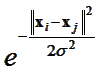 <br>
It has a paramter called gamma. `sklearn` library gives us two choice for setting this parameter. <br>
`scale` value, which is the default value, means `1 / (n_features * X.var())` and the `auto` value is `1 / n_features`. <br>
As the result shows, `scale` value has better accuracy, which was expected because the `scale` method consider the value of each data, rather than just the number of features of dataser.

1
Train Data Accuracy : 67.05%
Train Data Rand-Index : 11.33%
Test Data Accuracy : 66.29%
Test Data Rand-Index : 10.39%
Time Taken(s):  29.792577505111694

10
Train Data Accuracy : 67.57%
Train Data Rand-Index : 12.09%
Test Data Accuracy : 66.81%
Test Data Rand-Index : 11.1%
Time Taken(s):  27.808953762054443

100
Train Data Accuracy : 76.92%
Train Data Rand-Index : 28.81%
Test Data Accuracy : 76.49%
Test Data Rand-Index : 27.94%
Time Taken(s):  25.633058309555054

1000
Train Data Accuracy : 86.16%
Train Data Rand-Index : 52.26%
Test Data Accuracy : 85.62%
Test Data Rand-Index : 50.71%
Time Taken(s):  20.795956134796143

10000
Train Data Accuracy : 88.25%
Train Data Rand-Index : 58.49%
Test Data Accuracy : 87.33%
Test Data Rand-Index : 55.71%
Time Taken(s):  21.60995888710022



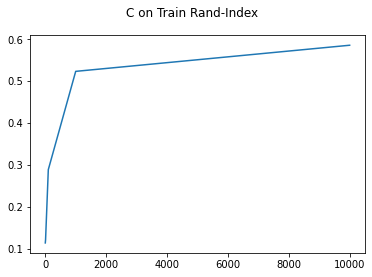

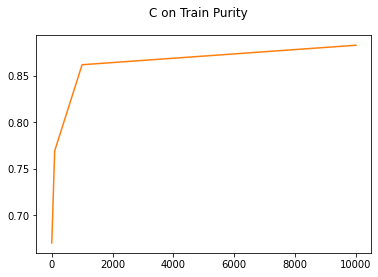

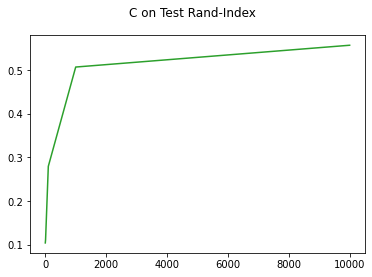

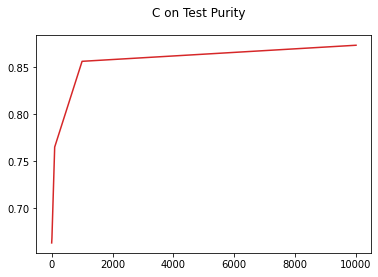

In [ ]:
Cs = [1, 10, 100, 1000, 10000]
train_purities = []
train_rand_indexes = []
test_purities = []
test_rand_indexes = []

for C in Cs :
    svm = SVC(kernel='rbf', C=C)
    
    print(C)
    svm_test = SVMTest(svm, X_train_sample, y_train_sample)
    train_purity, train_rand_index, test_purity, test_rand_index = svm_test.test_svm(test_data_features, test_data_labels)
    print()

    train_purities.append(train_purity)
    train_rand_indexes.append(train_rand_index)
    test_purities.append(test_purity)
    test_rand_indexes.append(test_rand_index)


plt.plot(Cs, train_rand_indexes)
plt.suptitle('C on Train Rand-Index')
plt.show()
plt.plot(Cs, train_purities, 'tab:orange')
plt.suptitle('C on Train Purity')
plt.show()
plt.plot(Cs, test_rand_indexes, 'tab:green')
plt.suptitle('C on Test Rand-Index')
plt.show()
plt.plot(Cs, test_purities, 'tab:red')
plt.suptitle('C on Test Purity')
plt.show()

For the linear kernel, best value for parameter C was 10000. <br>
But this value will be different for the rbf kernel since. <br>
As you can see in the plots the best value for value when using rbf kernel, is 5 and it is the value we will use in the following codes.

# Conclusion
After all the tests on different kernels and paramater changing, we saw that on 10% of the whole dataset which is selected randomly, the rbf or gaussian kernel has the best performance. <br>
And for the rbf kernel, `c=10000.0` and `gamma='scale'`, which is the default value, has better accuracy. <br>
Also we saw that the scores for both one-vs-one and one-vs-all techniques was the same. But we choose one-vs-all because it was the default value and prefered by `sklearn` community. <br>
So now we expect that if we set these parameters to the whole dataset, we would have a high accuracy. <br>

In [ ]:
linear_kerner_svm = SVMTest(SVC(kernel='rbf', C=10000), train_data_features, train_data_labels)
linear_kerner_svm.test_svm(test_data_features, test_data_labels)

Train Data Purity : 88.47%
Train Data Rand-Index : 59.16%
Test Data Purity : 88.1%
Test Data Rand-Index : 58.06%
Time Taken(s):  1271.1785180568695


(0.8846723898983677, 0.591612833284695, 0.8810440406529104, 0.580555741736568)